In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
loan = pd.read_csv('loan_data.csv')

In [47]:
loan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,0.737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,0.707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,0.682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,0.712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,0.667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,0.727,6120.041667,50807,51.0,0,0,0,0
6,1,0,0.1496,194.02,10.714418,4.00,0.667,3180.041667,3839,76.8,0,0,1,1
7,1,2,0.1114,131.22,11.002100,11.08,0.722,5116.000000,24220,68.6,0,0,0,1
8,1,3,0.1134,87.19,11.407565,17.25,0.682,3989.000000,69909,51.1,1,0,0,0
9,1,0,0.1221,84.12,10.203592,10.00,0.707,2730.041667,5630,23.0,1,0,0,0


In [12]:
import seaborn as sns

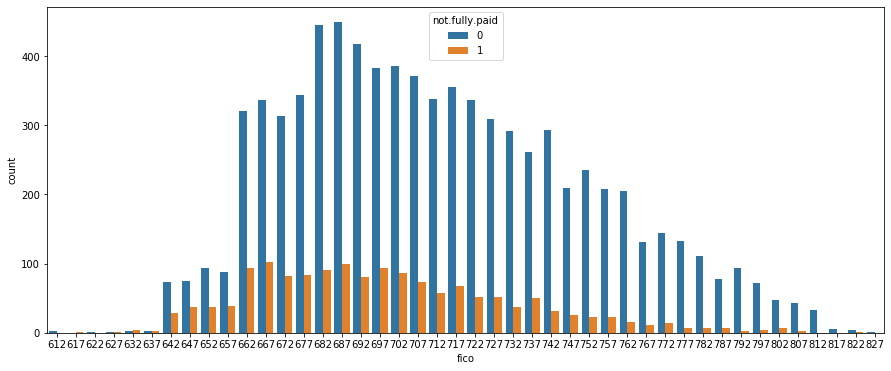

In [25]:
%matplotlib inline
plt.figure(figsize=(15,6))
sns.countplot(x=loan['fico'],hue=loan['not.fully.paid'])

In [35]:
loan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [36]:
#altering purpose column
def pur(name):
    d = {'debt_consolidation':0, 'credit_card':1, 'all_other':2,
       'home_improvement':3, 'small_business':4, 'major_purchase':5,
       'educational':6}
    return(d[name])

In [41]:
#scaling fico and altering name of purpose to numbers
loan['purpose'] = loan['purpose'].apply(pur)
loan['fico'] = loan['fico']/1000

In [50]:
loan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,0.737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,0.707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,0.682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,0.712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,0.667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,0.727,6120.041667,50807,51.0,0,0,0,0
6,1,0,0.1496,194.02,10.714418,4.00,0.667,3180.041667,3839,76.8,0,0,1,1
7,1,2,0.1114,131.22,11.002100,11.08,0.722,5116.000000,24220,68.6,0,0,0,1
8,1,3,0.1134,87.19,11.407565,17.25,0.682,3989.000000,69909,51.1,1,0,0,0
9,1,0,0.1221,84.12,10.203592,10.00,0.707,2730.041667,5630,23.0,1,0,0,0


In [51]:
#Scaling the columns between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [52]:
scale = MinMaxScaler()

In [54]:
#First scaling the columns which has large values other than single digits
scale.fit(loan.drop(['credit.policy','int.rate','fico','not.fully.paid','inq.last.6mths','delinq.2yrs','pub.rec','purpose'],axis=1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [58]:
loan_filter1 = scale.transform(loan.drop(['credit.policy','int.rate','fico','not.fully.paid','inq.last.6mths','delinq.2yrs','pub.rec','purpose'],axis=1))

In [60]:
#scaling the single digit values between 0 and 1
scale.fit(loan[['inq.last.6mths','delinq.2yrs','pub.rec','purpose']])
loan_filter2 = scale.transform(loan[['inq.last.6mths','delinq.2yrs','pub.rec','purpose']])

In [67]:
loan_filter1 = pd.DataFrame(loan_filter1)
loan_filter2 = pd.DataFrame(loan_filter2)

In [77]:
#combining scaled and non scaled columns and forming single final dataframe
loan_final = pd.concat([loan_filter2,loan_filter1,loan[['credit.policy','int.rate','not.fully.paid','fico']]],axis=1)

In [78]:
loan_final.head()

,0,1,2,3,0,1,2,3,4,5,credit.policy,int.rate,not.fully.paid,fico
0,0.000000,0.000000,0.0,0.000000,0.879888,0.544762,0.650200,0.312754,0.023898,0.437815,1,0.1189,0,0.737
1,0.000000,0.000000,0.0,0.166667,0.229916,0.506334,0.476969,0.147818,0.027848,0.644538,1,0.1071,0,0.707
2,0.030303,0.000000,0.0,0.000000,0.379883,0.404820,0.388184,0.259495,0.002908,0.215126,1,0.1357,0,0.682
3,0.030303,0.000000,0.0,0.000000,0.158653,0.544762,0.270360,0.144379,0.027885,0.615126,1,0.1008,0,0.712
4,0.000000,0.076923,0.0,0.166667,0.094378,0.537503,0.499666,0.222613,0.003926,0.331933,1,0.1426,0,0.667


In [79]:
#splitting the dataset as training data and testing data
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(loan_final.drop('not.fully.paid',axis=1),loan_final['not.fully.paid'], test_size=0.3, random_state=66)

In [144]:
#converting the training and testing datasets into numpy arrays to process it through neural network
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [145]:
from tensorflow.keras.models import Sequential

In [146]:
model = Sequential()

In [147]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

In [148]:
#adding layers to model
model.add(Dense(2197,activation='relu'))
model.add(Dense(169,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [149]:
early = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=0.05)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [150]:
model.fit(X_train,y_train,epochs=100)

Train on 6704 samples
Epoch 1/100
6704/6704 [==============================] - 3s 478us/sample - loss: 0.4238 - accuracy: 0.8428
Epoch 2/100
6704/6704 [==============================] - 2s 248us/sample - loss: 0.4166 - accuracy: 0.8428
Epoch 3/100
6704/6704 [==============================] - 2s 238us/sample - loss: 0.4158 - accuracy: 0.8428
Epoch 4/100
6704/6704 [==============================] - 2s 251us/sample - loss: 0.4154 - accuracy: 0.8428 - loss: 0.4176 - accuracy: 
Epoch 5/100
6704/6704 [==============================] - 2s 243us/sample - loss: 0.4149 - accuracy: 0.8428
Epoch 6/100
6704/6704 [==============================] - 2s 247us/sample - loss: 0.4114 - accuracy: 0.8428
Epoch 7/100
6704/6704 [==============================] - 2s 289us/sample - loss: 0.4113 - accuracy: 0.8431
Epoch 8/100
6704/6704 [==============================] - 2s 260us/sample - loss: 0.4104 - accuracy: 0.8435
Epoch 9/100
6704/6704 [==============================] - 2s 241us/sample - loss: 0.4074 - accu

6704/6704 [==============================] - 2s 229us/sample - loss: 0.3477 - accuracy: 0.8689
Epoch 77/100
6704/6704 [==============================] - 1s 222us/sample - loss: 0.3491 - accuracy: 0.8665
Epoch 78/100
6704/6704 [==============================] - 2s 225us/sample - loss: 0.3434 - accuracy: 0.8675
Epoch 79/100
6704/6704 [==============================] - 2s 239us/sample - loss: 0.3426 - accuracy: 0.8686
Epoch 80/100
6704/6704 [==============================] - 2s 244us/sample - loss: 0.3454 - accuracy: 0.8693
Epoch 81/100
6704/6704 [==============================] - 2s 241us/sample - loss: 0.3400 - accuracy: 0.8719
Epoch 82/100
6704/6704 [==============================] - 2s 242us/sample - loss: 0.3411 - accuracy: 0.8707
Epoch 83/100
6704/6704 [==============================] - 2s 236us/sample - loss: 0.3354 - accuracy: 0.8720
Epoch 84/100
6704/6704 [==============================] - 2s 244us/sample - loss: 0.3365 - accuracy: 0.8747
Epoch 85/100
6704/6704 [=================

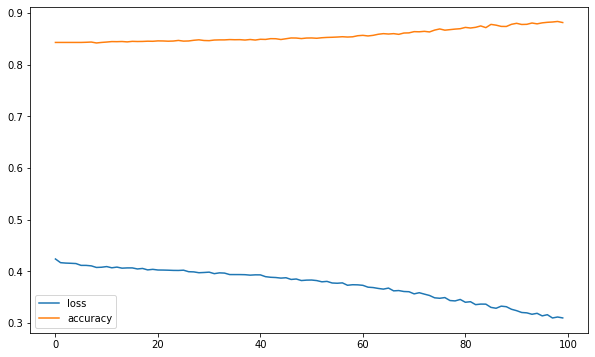

In [151]:
plt.figure(figsize=(10,6))
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.legend()

In [152]:
model.evaluate(X_test,y_test)

2874/2874 [==============================] - 0s 108us/sample - loss: 0.6752 - accuracy: 0.8152


[0.6751549517477894, 0.8152401]

In [ ]:
#81.5% accuracy